In [1]:
pip install tensorflow-datasets


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


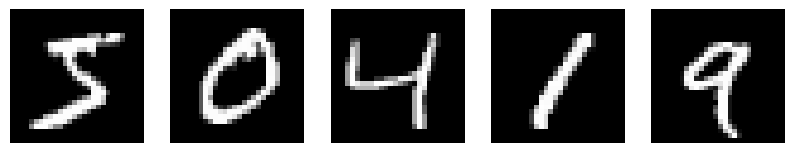

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Disable eager execution for TensorFlow 2.x compatibility mode
tf.compat.v1.disable_eager_execution()

# Load MNIST dataset using TensorFlow built-in data loader
mnist_path = tf.keras.utils.get_file('mnist.npz', 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz')
data = np.load(mnist_path)
x_train, y_train, x_test, y_test = data['x_train'], data['y_train'], data['x_test'], data['y_test']

data.close()

# Normalize pixel values (0-255 to 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images (28x28 -> 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Convert labels to one-hot encoding
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# Visualize some sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')
plt.show()

In [3]:
# Define network parameters
n_input = 784   # 28x28 pixels (flattened image)
n_hidden1 = 128 # First hidden layer with 128 neurons
n_hidden2 = 64  # Second hidden layer with 64 neurons
n_output = 10   # Output layer with 10 classes (digits 0-9)
learning_rate = 0.01
epochs = 10
batch_size = 100

# Define placeholders for input features (X) and labels (Y)
X = tf.compat.v1.placeholder(tf.float32, [None, n_input])
Y = tf.compat.v1.placeholder(tf.float32, [None, n_output])

# Initialize weights and biases for each layer
weights = {
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden1], stddev=0.1)),
    'h2': tf.Variable(tf.random.normal([n_hidden1, n_hidden2], stddev=0.1)),
    'out': tf.Variable(tf.random.normal([n_hidden2, n_output], stddev=0.1))
}
biases = {
    'b1': tf.Variable(tf.zeros([n_hidden1])),
    'b2': tf.Variable(tf.zeros([n_hidden2])),
    'out': tf.Variable(tf.zeros([n_output]))
}

In [4]:
# Define the neural network model
def neural_net(x):
    # First hidden layer with ReLU activation
    layer1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    
    # Second hidden layer with ReLU activation
    layer2 = tf.nn.relu(tf.add(tf.matmul(layer1, weights['h2']), biases['b2']))
    
    # Output layer (logits)
    out_layer = tf.add(tf.matmul(layer2, weights['out']), biases['out'])
    return out_layer


In [5]:
# Define forward propagation
logits = neural_net(X)  # Compute logits
prediction = tf.nn.softmax(logits)  # Apply softmax to get class probabilities

# Define loss function (cross-entropy for classification)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))

# Define backpropagation optimizer
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

# Define accuracy computation
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))  # Compare predicted and actual labels
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


In [6]:
# Train the model
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())  # Initialize all variables
    
    loss_values = []  # Store loss values for visualization
    acc_values = []  # Store accuracy values for visualization
    
    for epoch in range(epochs):
        avg_loss = 0
        total_batch = int(x_train.shape[0] / batch_size)
        
        for i in range(total_batch):
            batch_x = x_train[i * batch_size: (i + 1) * batch_size]
            batch_y = y_train[i * batch_size: (i + 1) * batch_size]
            _, batch_loss = sess.run([optimizer, loss], feed_dict={X: batch_x, Y: batch_y})
            avg_loss += batch_loss / total_batch  # Compute average loss per epoch
        
        # Compute training and test accuracy
        train_acc = sess.run(accuracy, feed_dict={X: x_train, Y: y_train})
        test_acc = sess.run(accuracy, feed_dict={X: x_test, Y: y_test})
        
        loss_values.append(avg_loss)
        acc_values.append(test_acc)
        
        # Print epoch-wise results
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    
    print("Training complete!")

Epoch 1, Loss: 0.2514, Train Accuracy: 0.9550, Test Accuracy: 0.9534
Epoch 2, Loss: 0.1382, Train Accuracy: 0.9631, Test Accuracy: 0.9567
Epoch 3, Loss: 0.1080, Train Accuracy: 0.9510, Test Accuracy: 0.9393
Epoch 4, Loss: 0.1036, Train Accuracy: 0.9741, Test Accuracy: 0.9618
Epoch 5, Loss: 0.0920, Train Accuracy: 0.9784, Test Accuracy: 0.9664
Epoch 6, Loss: 0.0837, Train Accuracy: 0.9790, Test Accuracy: 0.9673
Epoch 7, Loss: 0.0832, Train Accuracy: 0.9744, Test Accuracy: 0.9653
Epoch 8, Loss: 0.0795, Train Accuracy: 0.9761, Test Accuracy: 0.9634
Epoch 9, Loss: 0.0677, Train Accuracy: 0.9779, Test Accuracy: 0.9636
Epoch 10, Loss: 0.0695, Train Accuracy: 0.9832, Test Accuracy: 0.9686
Training complete!


In [7]:
# Plot loss and accuracy trends
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

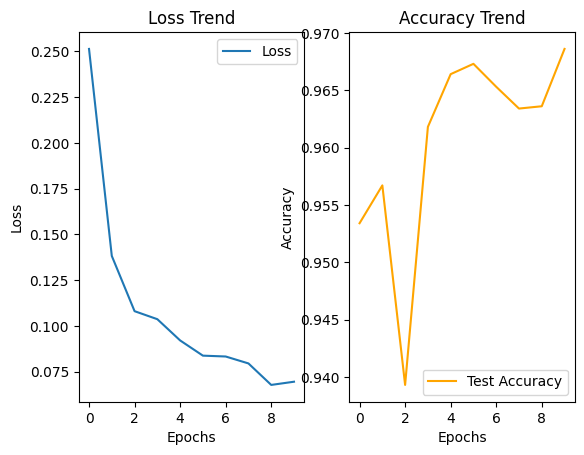

In [8]:
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_values, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.legend()
    
plt.subplot(1, 2, 2)
plt.plot(range(epochs), acc_values, label='Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Trend')
plt.legend()
    
plt.show()